## Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
statement_df = pd.read_csv("ida_statement_of_credits_grants_and_guarantees_historical_data_06-11-2024.csv")
statement_df.head()

,End of Period,Credit Number,Region,Country / Economy Code,Country / Economy,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,30-Jun-2022,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007335,...,0.0,0.0,0.0,01-Sep-1971,01-Mar-2011,12-May-1961,11-May-1961,29-Jun-1961,31-Jul-1967,NaN
1,30-Jun-2022,IDA00020,EASTERN AND SOUTHERN AFRICA,SD,Sudan,Ministry of Finance & Economic Planning,Repaying,0.75,USD,P002553,...,0.0,0.0,0.0,15-Jul-1971,15-Jan-2011,14-Jun-1961,13-Jun-1961,19-Oct-1961,31-Dec-1971,NaN
2,30-Jun-2022,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,P009610,...,0.0,0.0,0.0,15-Aug-1971,15-Feb-2011,21-Jun-1961,20-Jun-1961,25-Aug-1961,30-Jun-1967,NaN
3,30-Jun-2022,IDA00040,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,Fully Repaid,0.75,USD,P006585,...,0.0,0.0,0.0,01-Dec-1971,01-Jun-2011,28-Jun-1961,27-Jun-1961,21-Dec-1961,31-Dec-1968,NaN
4,30-Jun-2022,IDA00050,LATIN AMERICA AND CARIBBEAN,CO,Colombia,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P006701,...,0.0,0.0,0.0,01-Dec-1971,01-Jun-2011,28-Aug-1961,15-Aug-1961,25-Nov-1961,31-Dec-1968,NaN


In [4]:
statement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347107 entries, 0 to 1347106
Data columns (total 30 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   End of Period                    1347107 non-null  object 
 1   Credit Number                    1347107 non-null  object 
 2   Region                           1347107 non-null  object 
 3   Country / Economy Code           1347107 non-null  object 
 4   Country / Economy                1347107 non-null  object 
 5   Borrower                         1346663 non-null  object 
 6   Credit Status                    1347107 non-null  object 
 7   Service Charge Rate              1190144 non-null  float64
 8   Currency of Commitment           1347107 non-null  object 
 9   Project ID                       1347106 non-null  object 
 10  Project Name                     1347074 non-null  object 
 11  Original Principal Amount (US$)  1347107 non-null 

In [5]:
statement_df.tail()

,End of Period,Credit Number,Region,Country / Economy Code,Country / Economy,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
1347102,30-Jun-2024,IDAS0230,WESTERN AND CENTRAL AFRICA,SN,Senegal,Ministere des Finances et du Budget,Fully Repaid,0.75,USD,P002305,...,0.0,0.0,0.0,15-Nov-1981,15-May-1989,23-May-1979,24-Apr-1979,10-Aug-1979,31-Dec-1984,NaN
1347103,30-Jun-2024,IDAS0240,EASTERN AND SOUTHERN AFRICA,TZ,Tanzania,Ministry of Finance and Planning,Fully Repaid,0.75,USD,P002730,...,0.0,0.0,0.0,01-Apr-1982,01-Oct-1989,27-Feb-1980,27-Dec-1979,13-Aug-1980,30-Jun-1983,NaN
1347104,30-Jun-2024,IDAS0250,LATIN AMERICA AND CARIBBEAN,BO,Bolivia,MINISTRO DE ECONOMIA Y,Fully Repaid,0.75,USD,P006135,...,0.0,0.0,0.0,01-Jul-1990,01-Jan-2030,18-Jun-1980,26-Feb-1980,12-Dec-1980,31-Dec-1984,NaN
1347105,30-Jun-2024,IDAS0260,WESTERN AND CENTRAL AFRICA,SN,Senegal,MINISTERE DE L'ECONOMIE ET DES FINANCES,Fully Repaid,0.75,USD,P002307,...,0.0,0.0,0.0,15-Jan-1984,15-Jul-1990,18-Jun-1980,22-May-1980,29-Aug-1980,30-Jun-1986,NaN
1347106,30-Jun-2024,IDAS0270,EASTERN AND SOUTHERN AFRICA,TZ,Tanzania,Ministry of Finance and Planning,Fully Repaid,0.75,USD,P002729,...,0.0,0.0,0.0,15-Sep-1983,15-Mar-2030,30-Jun-1980,12-Jun-1980,12-Sep-1980,30-Sep-1982,NaN


In [6]:
statement_df.describe()

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Exchange Adjustment (US$),Borrower's Obligation (US$),Sold 3rd Party (US$),Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$)
count,1.190144e+06,1.347107e+06,1.347105e+06,1.347107e+06,1.347105e+06,1.347105e+06,1.347105e+06,1347105.0,1.347105e+06,1.347105e+06,1.347105e+06,1347105.0,1.347107e+06
mean,8.013294e-01,4.501705e+07,2.994546e+06,8.418845e+06,3.382005e+07,1.194960e+07,1.828089e+07,0.0,1.828089e+07,1.274931e+04,1.274931e+04,0.0,2.669971e+07
std,4.868172e-01,7.054316e+07,1.790930e+07,3.691255e+07,5.522832e+07,2.551819e+07,4.496993e+07,0.0,4.496993e+07,3.086914e+05,3.086914e+05,0.0,5.959539e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.083150e+07,-7.829253e+06,0.000000e+00,-5.370000e+00,0.0,-5.370000e+00,0.000000e+00,0.000000e+00,0.0,-3.083150e+07
25%,7.500000e-01,9.000000e+06,0.000000e+00,0.000000e+00,5.354550e+06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,7.500000e-01,2.000000e+07,8.166000e+01,0.000000e+00,1.500000e+07,2.270993e+06,1.027387e+06,0.0,1.027387e+06,0.000000e+00,0.000000e+00,0.0,4.169014e+06
75%,7.500000e-01,5.000000e+07,7.269634e+05,0.000000e+00,3.877998e+07,1.239365e+07,1.628565e+07,0.0,1.628565e+07,0.000000e+00,0.000000e+00,0.0,2.563715e+07
max,7.090000e+00,1.200000e+09,1.200000e+09,1.263214e+09,1.096893e+09,5.617663e+08,1.058347e+09,0.0,1.058347e+09,1.750000e+07,1.750000e+07,0.0,1.263214e+09


In [7]:
statement_df.isna().sum()

End of Period                           0
Credit Number                           0
Region                                  0
Country / Economy Code                  0
Country / Economy                       0
Borrower                              444
Credit Status                           0
Service Charge Rate                156963
Currency of Commitment                  0
Project ID                              1
Project Name                           33
Original Principal Amount (US$)         0
Cancelled Amount (US$)                  2
Undisbursed Amount (US$)                0
Disbursed Amount (US$)                  2
Repaid to IDA (US$)                     2
Due to IDA (US$)                        2
Exchange Adjustment (US$)               2
Borrower's Obligation (US$)             2
Sold 3rd Party (US$)                    2
Repaid 3rd Party (US$)                  2
Due 3rd Party (US$)                     2
Credits Held (US$)                      0
First Repayment Date              

In [8]:
statement_df.nunique()

End of Period                         162
Credit Number                       10616
Region                                 13
Country / Economy Code                131
Country / Economy                     139
Borrower                              380
Credit Status                          15
Service Charge Rate                   277
Currency of Commitment                  6
Project ID                           7591
Project Name                         8279
Original Principal Amount (US$)      2268
Cancelled Amount (US$)               6367
Undisbursed Amount (US$)           239609
Disbursed Amount (US$)              88268
Repaid to IDA (US$)                 85732
Due to IDA (US$)                   622758
Exchange Adjustment (US$)               1
Borrower's Obligation (US$)        622758
Sold 3rd Party (US$)                   20
Repaid 3rd Party (US$)                 20
Due 3rd Party (US$)                     1
Credits Held (US$)                 672010
First Repayment Date              

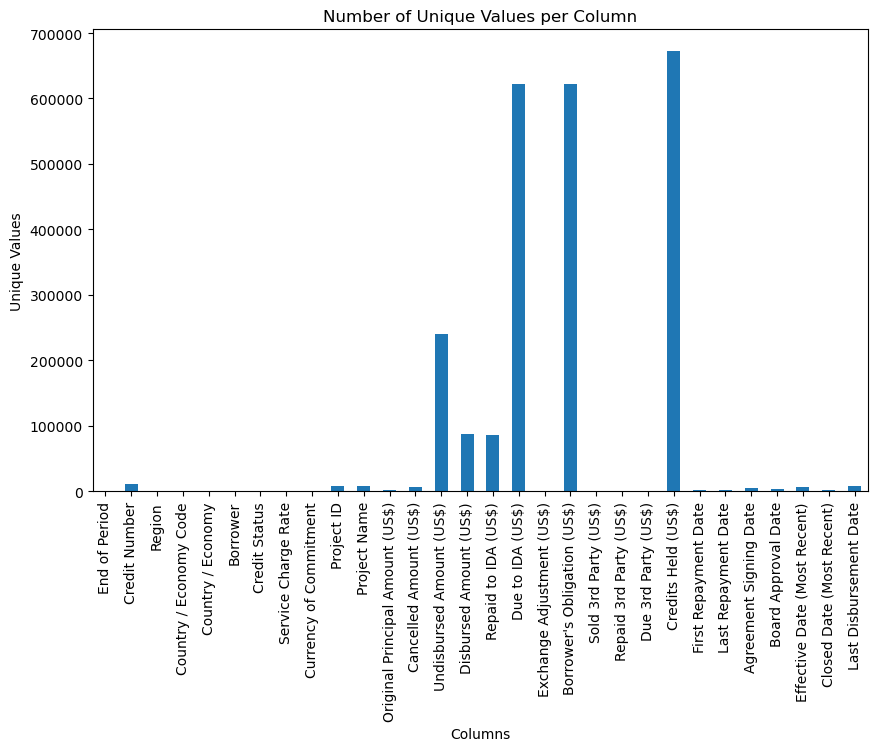

In [9]:
# Plot the number of unique values for each column
unique_counts = statement_df.nunique()
unique_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Unique Values')
plt.show()

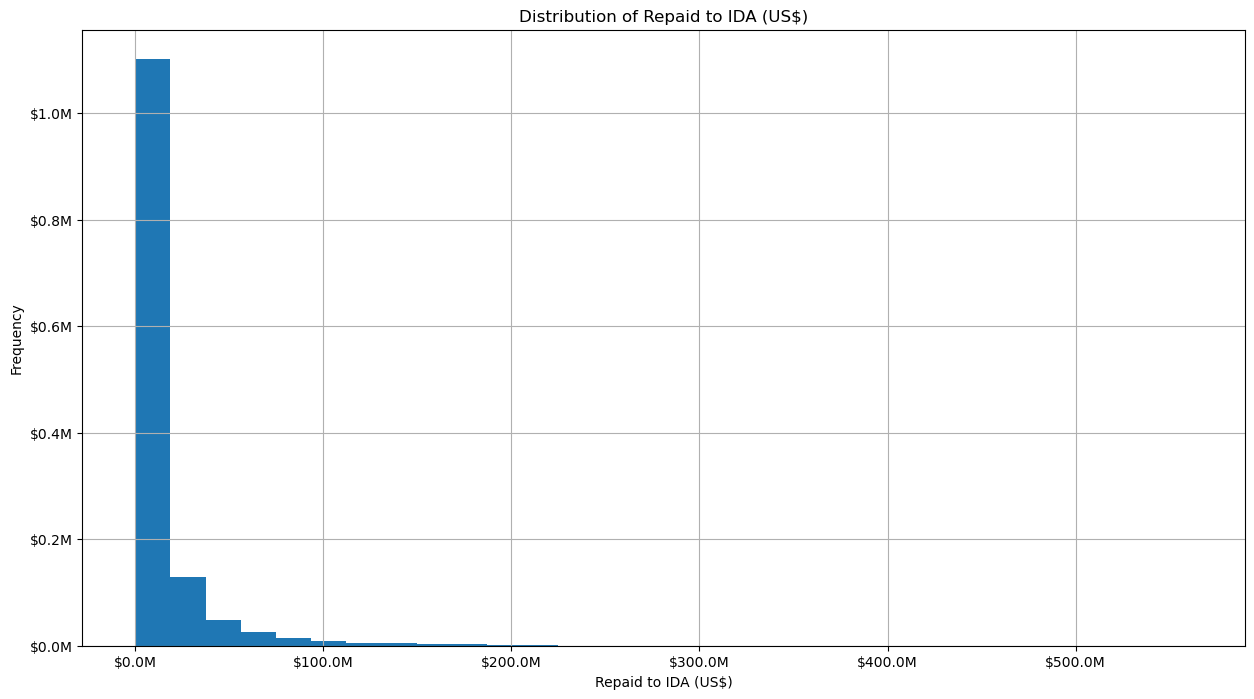

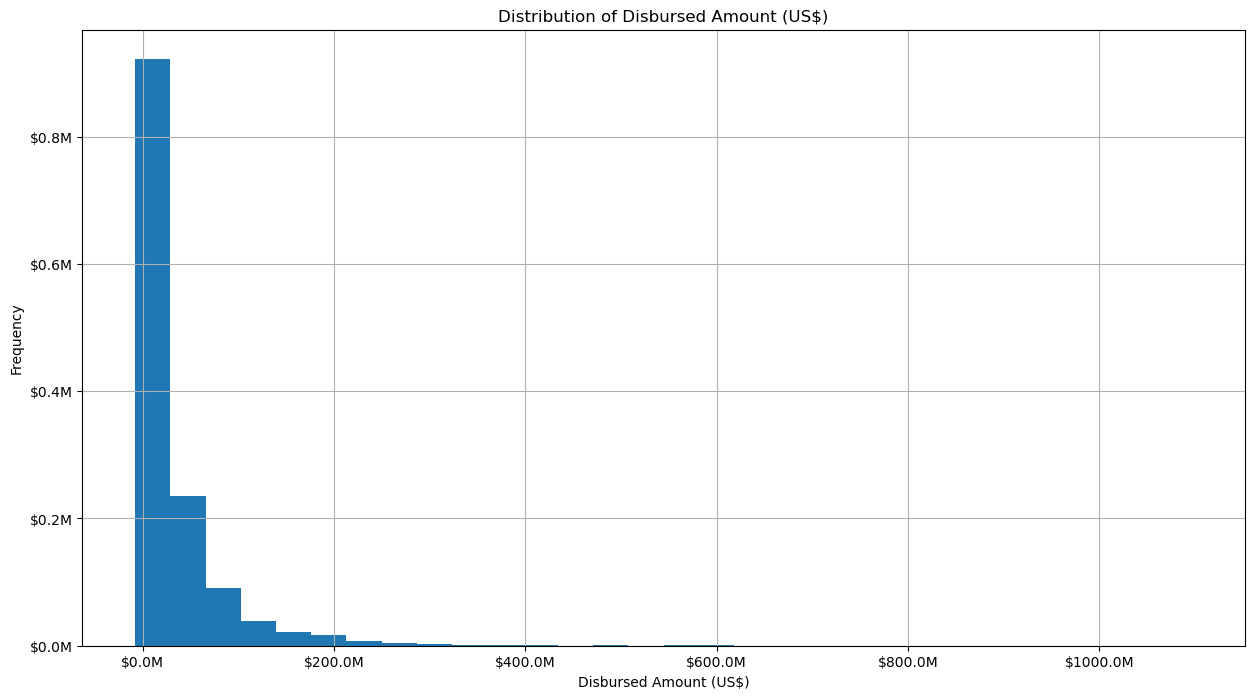

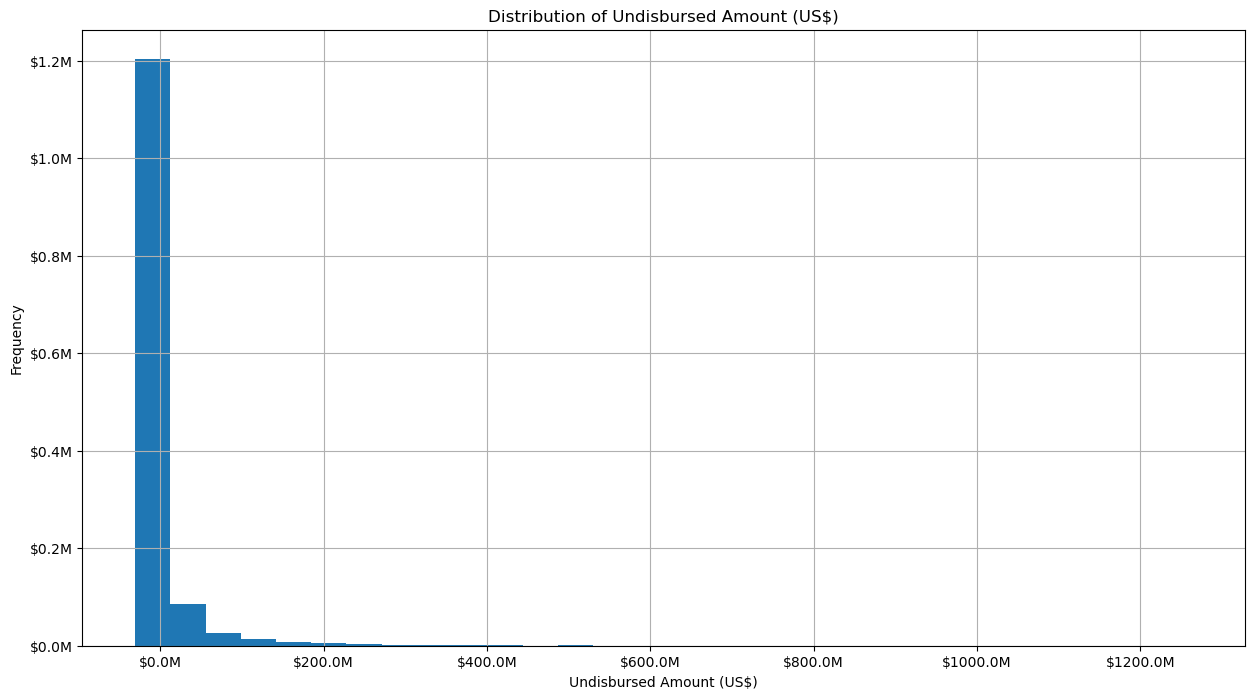

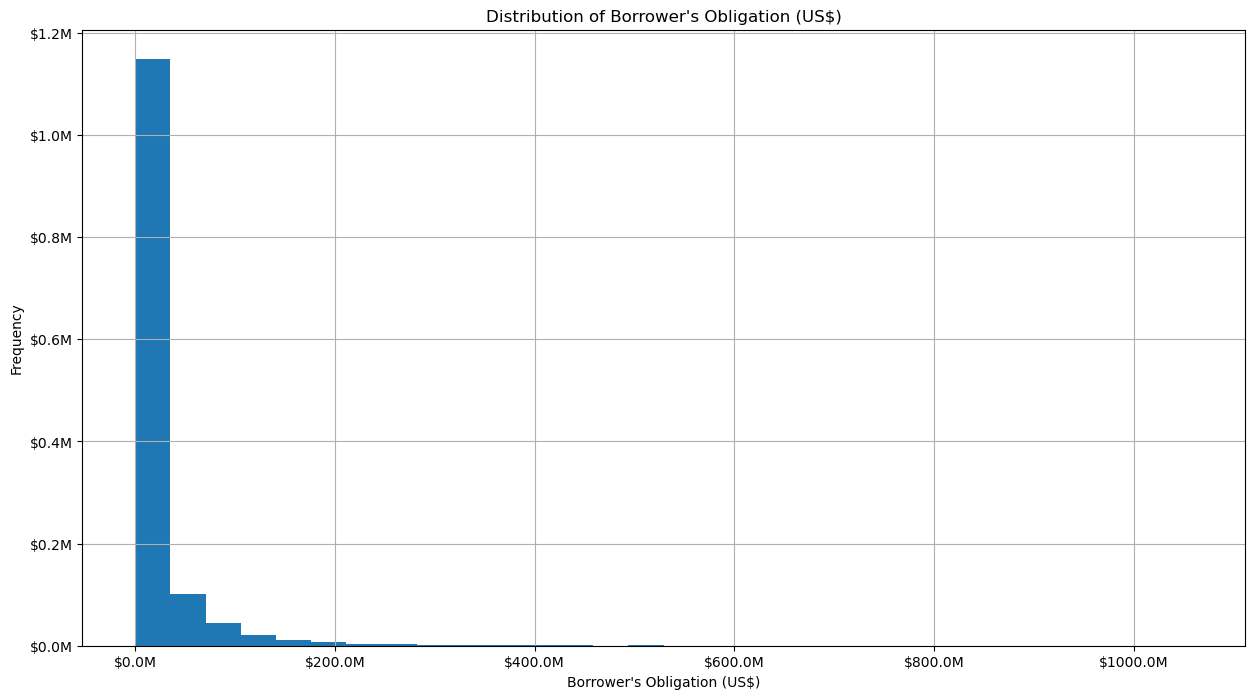

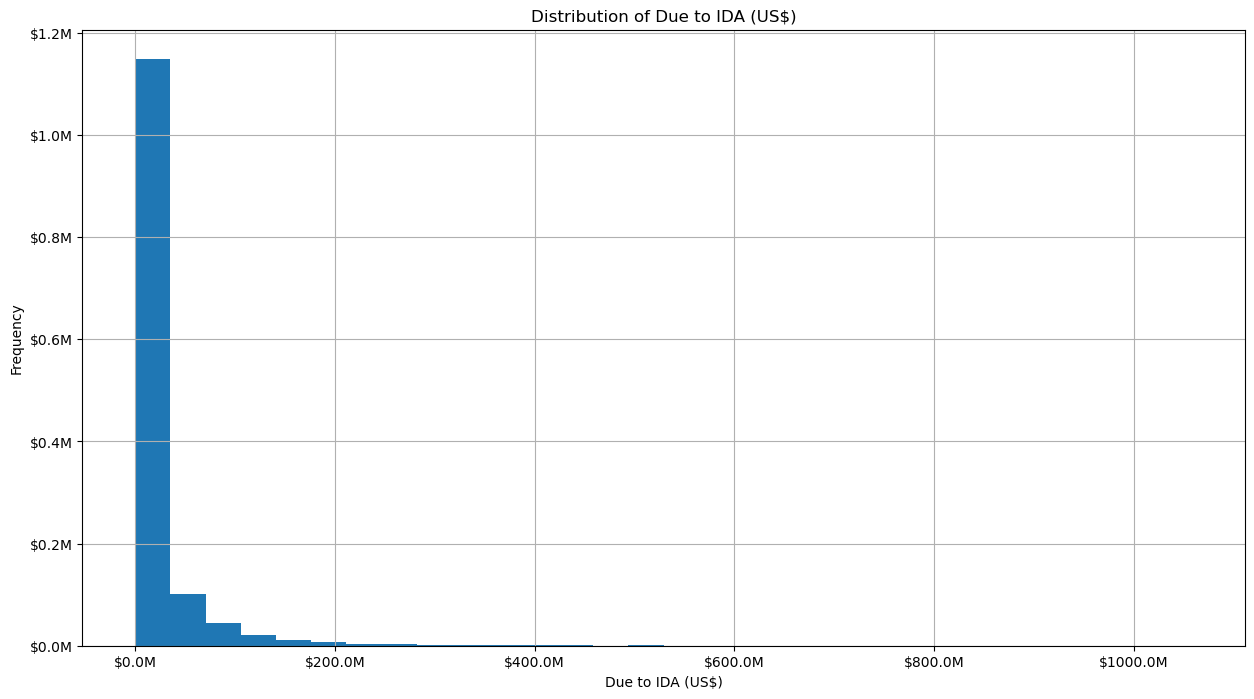

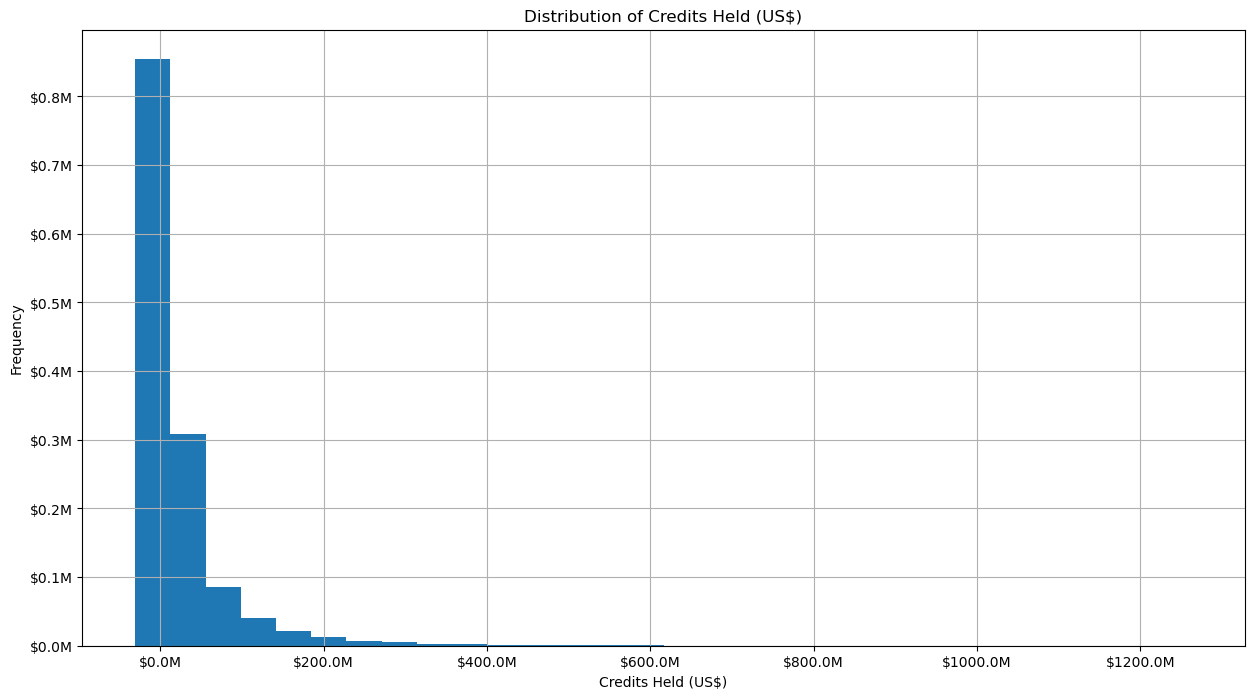

In [10]:
from matplotlib.ticker import FuncFormatter
most_unique = ["Repaid to IDA (US$)", "Disbursed Amount (US$)", "Undisbursed Amount (US$)", "Borrower's Obligation (US$)", "Due to IDA (US$)", "Credits Held (US$)"]

def millions(x, pos):
    return f"${x * 1e-6:.1f}M"

formatter = FuncFormatter(millions)

# Check these columns with most unique values
for col in most_unique:
    ax = statement_df[col].hist(bins=30, figsize=(15, 8))
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

In [11]:
# Define a threshold for categorizing columns as categorical based on the visualization
# threshold = 10  # Example threshold
# categorical_columns = unique_counts[unique_counts <= threshold].index.tolist()

# print("Categorical columns:", categorical_columns)